# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

<span style='color:red'> User is expected to get 15 elixirs, but not guaranteed </span>

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

<span style='color:red'> There is no certainty that user has to purchase 7 loot boxes in order to definitely get elixir. </span>

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

In [1]:
p_elixir = 0.15
p_no_elixir = 0.85
    
n_elixirs = 21
n_no_elixirs = 79

p_21elixirs = (p_no_elixir**n_no_elixirs) + (p_elixir**n_elixirs)
print(f'{p_21elixirs:.20f}')

0.00000265518711227012


#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

<span style='color:red'> $X$ has a countable sample space. </span>

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

<span style='color:red'> 
    Binomial distribution is best for $X$. 
    <br>
    <br>
    Reasons
    <br>
    1. A binary outcome applies here: Success = get elixir; Failure = no elixir. 
    <br>
    2. $X$ involves a fixed number of independent Bernoulli trials (100).
    <br>
    3. There is a constant probability of success.
    <br>
    4. Each trial is independent of one another.
    <br>
</span>

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Show your work; leave your answer in a comment.
p_elixir = 0.15
n_boxes = 100
n_elixir = 21

loot_distn = stats.binom(n_boxes, p_elixir)
p_21elixir_pmf = stats.binom.pmf(n_elixir, n_boxes, p_elixir)
print(p_21elixir_pmf)

# Chance that a user gets more than 20 elixirs is 0.027041674394230275

0.027041674394230275


In [4]:
prob = 0

In [5]:
# Iterate through getting 21, 22, 23, ...., 100 elixirs
# this calculate right side
for successes in range(21, 101):
    # Use the .pmf method to get P( X = successes) and add prob
    prob += stats.binom(n=100, p=0.15).pmf(successes)

In [6]:
prob

0.06631976581888152

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [7]:
# Show your work; leave your answer in a comment.
# this calculates left side (sum should be around 1)

p_21elixir_cdf = stats.binom.cdf(20, n_boxes, p_elixir)
print(p_21elixir_cdf)

# Cumulative chance that a user gets more than 20 elixirs is 0.960721908575349

0.9336802341811183


#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

<span style='color:red'> 
Chance that a user gets more than 20 elixirs is 0.027041674394230275.
<br>
Cumulative chance that a user gets more than 20 elixirs is 0.960721908575349.
</span>

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

<span style='color:red'> 
    Poisson distribution is best suited for random variable $Y$.
    <br>
    <br>
    Reasons:
    <br>
    1. Number of successes is always positive
    <br>
    2. Events occur independently
    <br>
    3. No 2 events can occur on the same user for that month
    <br>
    4. The probability of an event occurring in an interval is proportional to the length of the interval (1 month).
    <br>
    5. rate at which events occur is constant (provided in next question)
</span>

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [8]:
# Show your work; leave your answer in a comment.
# 1 loot box is $1 earned from customer (previously stated)

user_value = 2.7
revenue_needed = 500_000

users_per_month = 500_000 / 2.7
print(users_per_month)
print(round(users_per_month, -3))

# I would need at least 185,000 customers on my platform per month.

185185.18518518517
185000.0


#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

0.13709210691600804
68546.05345800403
68546.05
431453.95


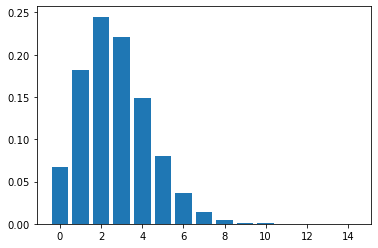

In [19]:
# Show your work; leave your answer in a comment.
n_boxes = 2.7
boxes_distn = stats.poisson(mu = n_boxes)

possible_boxes = list(range(15))
plt.bar(possible_boxes, boxes_distn.pmf(possible_boxes))

p_5orMore = boxes_distn.cdf(15) - boxes_distn.cdf(4)
print(p_5orMore) # 0.13709210691600804

high_value_earned = 0.13709210691600804 * 500_000
print(high_value_earned) # $68546.05345800403
print(round(high_value_earned, 2)) # $68,546.05
print(500_000 - 68_546.05) #$ 431,453.95

<span style='color:red'> 
    I expect to earn \$68,546.05 from "high value users" per month.
    <br>
    I expect to earn \$431,453.95 from "low value users" per month.
    <br>
</span>

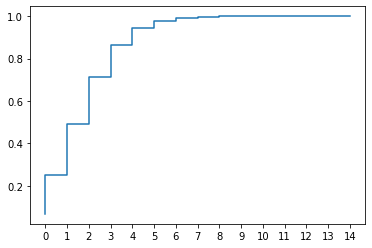

In [10]:
plt.step(possible_boxes, boxes_distn.cdf(possible_boxes))
plt.xticks(possible_boxes);

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

<span style='color:red'> 
    1. The number of loot boxes purchased by users ranged from 0 to 10.
    <br>
    2. About 50% of users last month purchased 2 loot boxes or less.
    <br>
    3. Around 7% of users did not purchase any loot box last month.
    <br>
</span>
<br>
**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [11]:
first_elixir = []
lootbox_options = ['get_elixir', 'no_elixir']
open_chance = np.random.choice(lootbox_options, p=[0.15, 0.85])

for trial_count in range(100_000): 
    # this range can be changed according to how many times the process needs to be repeated
    # in this case, would be 100,000 times
    count = 0
    for open_box in range(101): 
        #101 is an arbitrary number since chance of success is definite within 100 tries
        open_chance = np.random.choice(lootbox_options, p=[0.15, 0.85])
        # print(open_box, open_chance) as test
        if open_chance == 'no_elixir':
            count += 1
        if open_chance == 'get_elixir':
            count += 1
            first_elixir.append(count)
            # print(trial_count) as test
            break
print(first_elixir)

[1, 8, 2, 1, 2, 2, 1, 8, 15, 3, 9, 2, 3, 4, 9, 17, 8, 4, 3, 2, 2, 7, 2, 3, 9, 2, 2, 3, 7, 1, 1, 9, 2, 16, 4, 19, 4, 2, 8, 5, 5, 3, 2, 14, 5, 10, 4, 12, 4, 1, 6, 4, 1, 9, 2, 14, 13, 2, 4, 29, 9, 5, 2, 2, 2, 11, 4, 14, 4, 4, 1, 4, 12, 24, 4, 1, 7, 5, 3, 6, 8, 1, 4, 28, 20, 4, 6, 10, 1, 11, 5, 1, 3, 1, 18, 18, 3, 2, 1, 6, 5, 7, 5, 1, 3, 6, 1, 6, 2, 24, 4, 6, 10, 1, 2, 6, 1, 3, 1, 1, 2, 3, 1, 4, 9, 3, 2, 1, 14, 2, 5, 3, 2, 1, 2, 1, 13, 6, 6, 4, 8, 9, 8, 4, 13, 6, 9, 1, 3, 15, 21, 10, 1, 14, 2, 3, 9, 3, 4, 1, 11, 1, 10, 1, 2, 12, 12, 8, 1, 7, 4, 13, 1, 2, 1, 8, 3, 9, 3, 2, 6, 3, 5, 6, 12, 3, 1, 20, 5, 3, 9, 3, 5, 1, 35, 2, 4, 12, 4, 9, 12, 3, 10, 2, 1, 4, 4, 3, 4, 12, 4, 19, 1, 4, 9, 6, 3, 19, 1, 23, 10, 9, 1, 15, 17, 17, 10, 5, 1, 3, 31, 3, 9, 2, 10, 9, 5, 2, 19, 1, 5, 8, 13, 2, 1, 3, 1, 1, 2, 5, 3, 6, 4, 1, 15, 3, 6, 2, 10, 1, 1, 1, 4, 11, 1, 16, 9, 12, 11, 11, 1, 18, 23, 6, 2, 2, 9, 29, 5, 3, 1, 6, 19, 1, 25, 3, 1, 9, 3, 3, 1, 1, 8, 2, 2, 10, 5, 10, 5, 1, 14, 1, 3, 1, 4, 2, 17, 2, 2, 2, 

In [12]:
np.percentile(first_elixir, 5) # 5th percentile

1.0

In [13]:
np.percentile(first_elixir, 25) # 25th percentile

2.0

In [14]:
np.percentile(first_elixir, 50) # 50th percentile

5.0

In [15]:
np.percentile(first_elixir, 75) # 75th percentile

9.0

In [16]:
np.percentile(first_elixir, 95) # 95th percentile

19.0

In [17]:
np.percentile(first_elixir, 100) #100th percentile

86.0

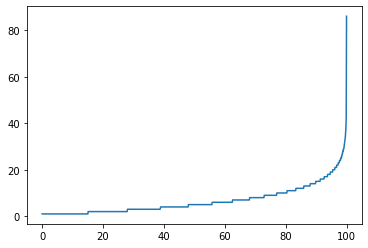

In [18]:
p = np.linspace(0, 100, 1000)

plt.gca().plot(p, np.percentile(first_elixir, p))

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

<font color=red>
Dictionary:
<br>
- keys would be the 4 different items.
<br>
- values would be datatype(list) of number(trials) of times the loot box has to be opened to get each item.
<br>
<br>
This would make it easier and clearer to calculate the average of the sums of each key-value pair.
</font>

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

<font color=red> 
Metrics I think would be important to measure are:
<br>
- Number of users that are active in a given month on each game version. 
<br>
- How much revenue per month is made from lootbox purchases on each game version.
<br>
- For each game version, drill down the revenue sources. 
    <br>
    - E.g. for version 1, since there is only 1 item type(elixir) for success, then the revenue from lootbox purchase can be inferred that users were aiming to get elixir
    <br>
    - However for version 2, since there are 4 different item types(elixir, pendant, armor, coin), different users will aim for different items at a different frequency. So finding out the revenue earned from purchases of each item type(regardless success or failure), will be useful to know which item types are more popular and users are more willing to spend money on them. 
    <br>
    - concentrating efforts on the more popular item types, adjusting the attributes of the item or the probability of getting the item to ensure sustained or increase popularity further and maximise revenue from the demand of these items.
    <br>
</font>

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.